### Exercise :4 Neural Networks (Back propagation and Forward Propagation)

In [12]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sci
import math as m

In [2]:
# Reading the data from the dataset
data=sci.loadmat("ex4data1.mat")

In [3]:
x=data["X"]
y=data["y"]

In [4]:
# Now the shape of the x and y data
print("The shape of the x and y :",x.shape,y.shape)

The shape of the x and y : (5000, 400) (5000, 1)


In [5]:
# splitting the training set and test set by the libraries called the sklearn
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

/home/sai/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# the size of the training and test data sets 
print("the shape of the training_set :",x_train.shape,y_train.shape)
print("the shape of the test set :",x_test.shape,y_test.shape)

the shape of the training_set : (4000, 400) (4000, 1)
the shape of the test set : (1000, 400) (1000, 1)


In [7]:
k=x[[1004,596,4994,4],:]

In [8]:
k=k.reshape((40,40))

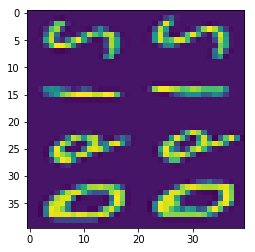

In [9]:
plt.imshow(k)

In [84]:
# creating the dummy variables 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
y_train[:,0]=le.fit_transform(y_train[:,0])
ohe=OneHotEncoder(categorical_features=[0])
y_train=ohe.fit_transform(y_train).toarray()

In [85]:
#feed forward propagation
def sigmoid(features,para,bias):
    line=np.dot(features,para.T)+bias.T
    h_act=1/(1+np.exp(-line))
    return h_act
def neural_nets(activates,h_para,h_bias,o_para,o_bias):
    h_act=sigmoid(activates,h_para,h_bias)
    o_act=sigmoid(h_act,o_para,o_bias)
    return o_act

##### Cost function for the neural networks

In [76]:
# cost function for the neural networks
def Cost_function(x_train,y_train,h_para,h_bias,o_para,o_bias):
    activates=neural_nets(x_train,h_para,h_bias,o_para,o_bias)
    ii=x_train.shape[0]
    kk=y_train.shape[1]
    total=0
    for i in range(ii):
        s=0
        for k in range(kk):
            
            c=-(y_train[i,k]*m.log(activates[i,k])+(1-y_train[i,k])*(m.log(1-activates[i,k])))
            s=s+c
        total=total+s
    return total/ii
        

In [149]:
# Now reading the parameters from the given mat file
para=sci.loadmat("ex4weights.mat")

In [150]:
para1=para["Theta1"]
para2=para["Theta2"]

In [151]:
h_para=para1[:,1:]
h_bias=para1[:,0]
h_bias=h_bias.reshape((25,1))
o_para=para2[:,1:]
o_bias=para2[:,0]
o_bias=o_bias.reshape((10,1))

In [152]:
cost=Cost_function(x_train,y_train,h_para,h_bias,o_para,o_bias)

In [153]:
print(cost)

0.2904109004183803


- Error : 0.290410900483803   it was caused by the given parameters and bias

##### Regularized cost function

- For regularized cost function here we use the regularization term  

In [165]:
def Regularized_functio(x_train,y_train,h_para,h_bias,o_para,o_bias,reg_para):
    m=x_train.shape[0]
    cost=Cost_function(x_train,y_train,h_para,h_bias,o_para,o_bias)
    h_sum=0
    for i in range(h_para.shape[0]):
        for j in range(h_para.shape[1]):
            h_sum=h_sum+h_para[i,j]
    o_sum=0
    for i in range(o_para.shape[0]):
        for j in range(o_para.shape[1]):
            o_sum=o_sum+o_para[i,j]
    
    reg_cost=cost+(reg_para/(2*m))*(h_sum+o_sum)
    return reg_cost

In [171]:
reg_para=0.3
cost_reg=Regularized_functio(x_train,y_train,h_para,h_bias,o_para,o_bias,reg_para)

In [172]:
a=o_para*o_para
k=sum(a)
a.shape

(10, 25)

In [173]:
print(cost_reg)

0.28739374468077783


#### Neural Networks (feed forward propgation and backward propagation)

In [72]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sci
import math as m

In [7]:
# loading the minset data
data=sci.loadmat("ex4data1.mat")

In [8]:
# extracting the target variable and the features varibles 
x=data["X"]
y=data["y"]

In [9]:
# creating the dummy varibles
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
Le=LabelEncoder()
y[:,0]=Le.fit_transform(y[:,0])
ohe=OneHotEncoder(categorical_features=[0])
y=ohe.fit_transform(y).toarray()

In [10]:
# splitting the dataset in to the trainset and test set data
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [70]:
# printing the shape of train set and test set
print("the shape of the training set is :",x_train.shape,y_train.shape)
print("the shape of the test set is :",x_test.shape,y_test.shape)

the shape of the training set is : (4000, 400) (4000, 10)
the shape of the test set is : (1000, 400) (1000, 10)


- shape of h_para =(25 x 400)
- shape of o_para =(10 x 25)
- shape of h_bias =(25 x 1)
- shape of o_bias =(10 x 1)

In [97]:
def sigmoidd(features,para,bias):
    line=np.dot(features,para.T)+bias.T
    h_act=1/(1+np.exp(-line))
    return h_act
def neural_netss(activates,h_para,h_bias,o_para,o_bias):
    h_act=sigmoidd(activates,h_para,h_bias)
    o_act=sigmoidd(h_act,o_para,o_bias)
    return [h_act,o_act]
def Derv_sigmoid(act):
    return act*(1-act)


In [196]:
def Back_propagation(features,target,h_act,o_act,h_para,h_bias,o_para,o_bias,learning_rate):
    # finding error in the output layer
    m=features.shape[0]
   
    Eo=target-o_act
   
    # change in the error in the outputlayer
    d_output=Eo*Derv_sigmoid(o_act)
    
    #finding error in the hidden layer 
    Eh=np.dot(Eo,o_para)
    # change in the error in the hidden layer
    d_hidden=Eh*Derv_sigmoid(h_act)
    
    # apply gradient descent to change the output weights
    o_para=o_para.T+(learning_rate/m)*(np.dot(h_act.T,Eo))
    # apply gradient descent to change the hidden weights
    h_para=h_para.T+(learning_rate/m)*(np.dot(features.T,d_hidden))
    o_para=o_para.T
    h_para=h_para.T
   # print(d_hidden.shape)
    # apply gradient descent to change the output bias
    hbias_s=0
    for i in range(d_hidden.shape[0]):
        hbias_s=hbias_s+d_hidden[i,:]
    hbias_s=hbias_s.reshape((25,1))
    obias_s=0
    for i in range(d_output.shape[0]):
        obias_s=obias_s+d_output[i,:]
    obias_s=obias_s.reshape((10,1))
    h_bias=h_bias+hbias_s*learning_rate/m
    # apply gradient descent to change the hidden bias
    o_bias=o_bias+obias_s*learning_rate/m
    # return hidden_weights,hidden_bias,output_weights,output_bias
    return [h_para,h_bias,o_para,o_bias]
    

In [197]:
def Neural_nets(acts,target,h_para,h_bias,o_para,o_bias,learning_rate):
    num_iters=500
    for _ in range(num_iters):
        # feed in to the feed forward_propagation
        h_act,o_act=neural_netss(acts,h_para,h_bias,o_para,o_bias)
        # operate  to the backward propagation
        h_para,h_bias,o_para,o_bias=Back_propagation(acts,target,h_act,o_act,h_para,h_bias,o_para,o_bias,learning_rate)
        
    return [h_para,h_bias,o_para,o_bias]

        

In [247]:
learning_rate=4
# initially the parameters are :
ih_para=2*np.random.random((25,400))-1
ih_bias=2*np.random.random((25,1))-1
io_para=2*np.random.random((10,25))-1
io_bias=2*np.random.random((10,1))-1
h_para,h_bias,o_para,o_bias=Neural_nets(x_train,y_train,ih_para,ih_bias,io_para,io_bias,learning_rate)

In [248]:
def Cost_function(x_train,y_train,h_para,h_bias,o_para,o_bias):
    _,activates=neural_netss(x_train,h_para,h_bias,o_para,o_bias)
    ii=x_train.shape[0]
    kk=y_train.shape[1]
    total=0
    for i in range(ii):
        s=0
        for k in range(kk):
            y_t=y_train[i,k]
            c=-(y_t*m.log(activates[i,k])+(1-y_t)*(m.log(1-activates[i,k])))
            s=s+c
        total=total+s
    return total/ii

In [249]:
_,pre=neural_netss(x_test,h_para,h_bias,o_para,o_bias)

In [250]:
pre

array([[2.40646859e-04, 6.64560525e-03, 3.84246423e-02, ...,
        2.35595516e-05, 1.43830863e-05, 7.64508996e-01],
       [6.76603976e-02, 6.15302501e-06, 7.58825627e-08, ...,
        5.22487369e-06, 2.42890423e-05, 5.72397507e-04],
       [3.85692428e-04, 1.19848704e-04, 1.68549393e-02, ...,
        3.63512443e-04, 9.04374329e-01, 7.83993972e-06],
       ...,
       [9.73329394e-01, 3.26270213e-03, 1.15436527e-05, ...,
        5.77942662e-04, 1.54129765e-03, 2.69080149e-05],
       [6.61971027e-03, 9.58979654e-01, 4.67580622e-02, ...,
        2.54998617e-05, 1.76703401e-04, 7.63861517e-04],
       [5.11864819e-05, 1.10868161e-01, 1.51855261e-06, ...,
        6.62563574e-03, 2.03249841e-05, 6.01365921e-04]])

In [251]:
# finding the error of the cost function is :
err=Cost_function(x_train,y_train,h_para,h_bias,o_para,o_bias)
print(err)

0.5455151547058986


In [252]:
h_para

array([[ 0.20423921, -0.98686291, -0.6935662 , ..., -0.61575851,
        -0.24674475,  0.11213114],
       [-0.83279443,  0.73874456,  0.7060226 , ...,  0.15577186,
         0.52824348,  0.00529602],
       [ 0.06334598, -0.0465581 , -0.01055137, ..., -0.85768463,
         0.59428379,  0.3073965 ],
       ...,
       [ 0.16806966, -0.00938148,  0.6147456 , ...,  0.06776565,
        -0.02237725,  0.33851663],
       [ 0.59338206,  0.85867007,  0.44258609, ...,  0.66522019,
        -0.48758009, -0.8238128 ],
       [ 0.24393557, -0.50914577,  0.95265663, ..., -0.80128867,
        -0.9001846 , -0.36495792]])

In [253]:
predict=[]
for i in pre:
    s=[]
    for j in i:
        if(j>=0.5):
            s.append(1)
        else:
            s.append(0)
    predict.append(s)

In [254]:
predict

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0,

In [261]:
y_test[6]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])